In [273]:
import numpy as np
import pandas as pd

#### CSV dosyasını yükleme

In [274]:
df = pd.read_csv("top10s.csv")
df.head()

,Unnamed: 0,title,artist,genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


### [Q4] Find how many songs are there in each genre? 

In [275]:
df.groupby('genre')['genre'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

,genre,count
25,dance pop,327
48,pop,60
18,canadian pop,34
12,boy band,15
8,barbadian pop,15


### [Q5] Find the most popular artists in each year

In [320]:
f = {'pop': 'mean', 'year':'count'}
comp = df.groupby(['artist','year'], as_index=False).agg(f)
comp = comp[comp['year']>=3]
comp = comp[comp['pop']>75]
comp.sort_values('pop', ascending=False)

,artist,pop,year
118,Ed Sheeran,83.200000,5
380,The Chainsmokers,80.000000,3
114,Dua Lipa,78.333333,3
356,Shawn Mendes,78.250000,4
382,The Chainsmokers,77.000000,3
297,One Direction,75.666667,3
379,The Chainsmokers,75.666667,3
45,Bruno Mars,75.333333,3


### [Q6] Write a dplyr code that finds top 5 genres for the years 2018, 2019

In [335]:
 mask = (df['year'] > 2017 ) &  (df['year'] <= 2019)
 found_genres = df.loc[mask]['genre'].drop_duplicates()
 found_genres

508               dance pop
510                     pop
512            canadian pop
519                     edm
520           barbadian pop
522                 brostep
530                 hip hop
535              electropop
536    contemporary country
550                   latin
559         detroit hip hop
563               downtempo
568            moroccan pop
580             escape room
583                boy band
588         alternative r&b
591                big room
596         electronic trap
Name: genre, dtype: object

### [Q7] Create a graph that visualizes mean energy for the combination of years
2018 and 2019

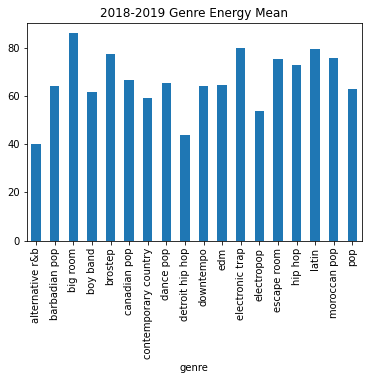

In [358]:
import matplotlib.pyplot as plt 

dd = df.loc[df['genre'].isin(found_genres)]
dd = dd.loc[(dd['year'] > 2017) & (dd['year'] <= 2019)]
engry_mean =dd.groupby('genre')['nrgy'].mean()
engry_mean.plot.bar(title="2018-2019 Genre Energy Mean")
plt.show(block=True);

### [Q8] Create a new variable called genre_group

In [383]:
new_df = df
conditions = [
    (new_df['genre'] == 'pop'),
    (new_df['genre'] == 'hip hop'),
    (new_df['genre'] != 'pop') | (new_df['genre'] != 'hip hop')
]

values = ['pop','hip hop', 'other genre']
new_df['genre_group'] = np.select(conditions,values)
print(len(new_df[new_df['genre_group']=='hip hop']))
print(len(new_df[new_df['genre_group']=='other genre']))
print(len(new_df[new_df['genre_group']=='pop']))


4
539
60


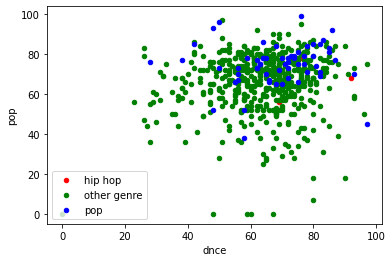

In [411]:
fig, ax = plt.subplots()
colors = {'hip hop':'red', 'other genre':'green', 'pop': 'blue'}

for key,group in df.groupby('genre_group'):
    group.plot(ax=ax, kind='scatter', x='dnce', y='pop', marker = 'o', label=key, color=colors[key])

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
fig.canvas.mpl_connect("motion_notify_event", hover)

ax.legend()
plt.show()